In [1]:
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
import datetime

from unityagents import UnityEnvironment
from model_bi import Actor, Critic
from ddpg_agent_bi import Agent, OUNoise, ReplayBuffer

In [2]:
env = UnityEnvironment(file_name='C:/Users/adamb/OneDrive/Documents/Udacity Reinforcement Learning/3. Policy Base Methods/p2_continous_control/Reacher_Windows_x86_64/Reacher')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

In [5]:
action_size = brain.vector_action_space_size

In [6]:
states = env_info.vector_observations
state_size = states.shape[1]

In [7]:
agent = Agent(state_size=state_size, 
              action_size=action_size,
              random_seed=42)

In [8]:
##Variables
def ddpg(n_episodes=2000, max_t=1000, deque_len=100, print_every=100):
    
    scores = []
    scores_window = deque(maxlen=deque_len)
    scores_avg = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0] 
        agent.reset()
        score = 0
        
        for t in range(max_t):
            ##Determine next action
            action = agent.act(state)
            
            ##Execute Action
            env_info = env.step(action)[brain_name]  
            
            ##Get Next State after Action
            next_state = env_info.vector_observations[0]
            
            ##Get reward and done status from environment
            reward = env_info.rewards[0]                  
            done = env_info.local_done[0]  
            
            ##Update Agent
            agent.step(state, action, reward, next_state, done)
            
            ##Update Scores and state
            score += reward  
            state = next_state  
            
            ##End episode if done
            if done:
                break
            
        print(datetime.datetime.now())
        print('Score: ' + str(score))
        
        scores_window.append(score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        scores_avg.append(np.mean(scores_window))
        print()
        
    return scores, scores_avg

In [9]:
scores, scores_avg = ddpg(n_episodes = 200, max_t = 1000, deque_len = 20, print_every=100)

C:\Users\adamb\Anaconda3\envs\testenv4\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


2019-12-20 17:39:26.810512
Score: 0.25999999418854713
Episode 1	Average Score: 0.26
2019-12-20 17:39:45.211231
Score: 1.3999999687075615
Episode 2	Average Score: 0.83
2019-12-20 17:40:03.540156
Score: 0.7499999832361937
Episode 3	Average Score: 0.80
2019-12-20 17:40:21.977937
Score: 1.4199999682605267
Episode 4	Average Score: 0.96
2019-12-20 17:40:40.509696
Score: 1.029999976977706
Episode 5	Average Score: 0.97
2019-12-20 17:40:59.099072
Score: 2.339999947696924
Episode 6	Average Score: 1.20
2019-12-20 17:41:17.583149
Score: 1.959999956190586
Episode 7	Average Score: 1.31
2019-12-20 17:41:36.127824
Score: 1.6299999635666609
Episode 8	Average Score: 1.35
2019-12-20 17:41:54.571930
Score: 0.9599999785423279
Episode 9	Average Score: 1.31
2019-12-20 17:42:13.028731
Score: 1.3099999707192183
Episode 10	Average Score: 1.31
2019-12-20 17:42:31.433476
Score: 0.4399999901652336
Episode 11	Average Score: 1.23
2019-12-20 17:42:50.015142
Score: 0.8499999810010195
Episode 12	Average Score: 1.20
201

2019-12-20 18:09:51.585291
Score: 0.8999999798834324
Episode 99	Average Score: 1.04
2019-12-20 18:10:10.469984
Score: 1.0599999763071537
Episode 100	Average Score: 1.02

2019-12-20 18:10:29.195991
Score: 1.3099999707192183
Episode 101	Average Score: 1.01
2019-12-20 18:10:47.921133
Score: 1.389999968931079
Episode 102	Average Score: 1.06
2019-12-20 18:11:06.646729
Score: 1.1899999734014273
Episode 103	Average Score: 1.07
2019-12-20 18:11:25.460647
Score: 2.799999937415123
Episode 104	Average Score: 1.15
2019-12-20 18:11:44.260326
Score: 1.099999975413084
Episode 105	Average Score: 1.15
2019-12-20 18:12:03.102948
Score: 1.6199999637901783
Episode 106	Average Score: 1.19
2019-12-20 18:12:21.879642
Score: 0.2299999948590994
Episode 107	Average Score: 1.14
2019-12-20 18:12:40.721408
Score: 1.5699999649077654
Episode 108	Average Score: 1.18
2019-12-20 18:12:59.492613
Score: 0.8699999805539846
Episode 109	Average Score: 1.20
2019-12-20 18:13:18.249276
Score: 0.549999987706542
Episode 110	Aver

2019-12-20 18:40:41.976194
Score: 1.0399999767541885
Episode 196	Average Score: 1.17
2019-12-20 18:41:01.480919
Score: 1.6099999640136957
Episode 197	Average Score: 1.20
2019-12-20 18:41:20.942034
Score: 1.1099999751895666
Episode 198	Average Score: 1.20
2019-12-20 18:41:40.380734
Score: 1.0399999767541885
Episode 199	Average Score: 1.18
2019-12-20 18:41:59.876512
Score: 1.0099999774247408
Episode 200	Average Score: 1.14



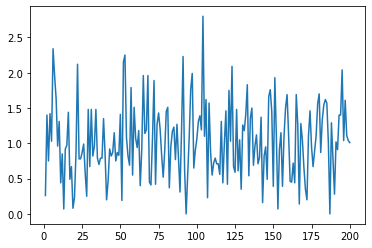

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)

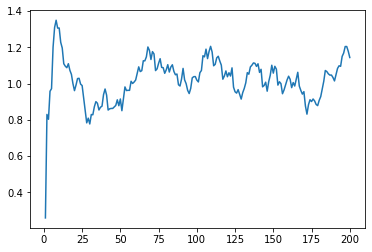

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_avg)+1), scores_avg)